# Set up

In [153]:
import torch
import torchvision
import torchvision.transforms as T
import plotly.express as px
from PIL import Image
from utils import load_model_from_checkpoint, get_transforms, plot_four
import argparse
import numpy as np
import os

In [154]:
device = torch.device("cuda" if torch.cuda.is_available()
                else "mps" if torch.backends.mps.is_built() else "cpu")


COLORSPACE = 'RGB'
RESOLUTION = (128,128)
transform_style, transform_source = get_transforms(COLORSPACE, RESOLUTION)

# Define paths to model and source and style folders
Folders should contains images (.jpg, .png, .jpeg). Each possible source - style combination will be created

In [155]:
MODEL_PATH = 'checkpoints/RGB_Latent32_best_model.pth.tar'
SOURCE_PATH = 'images/source'  
STYLE_PATH = 'images/style'

# Load model

In [156]:
model = load_model_from_checkpoint(MODEL_PATH)
model = model.to(device)

Model loaded successfully from checkpoint.


# Load data 

In [157]:
source_images = [] 
source_tensors = []
grayscale_images = []
for file in os.listdir(SOURCE_PATH):
    source_image = Image.open(os.path.join(SOURCE_PATH, file)).resize(RESOLUTION)
    source_images.append(source_image)
    if source_image.mode!=COLORSPACE:
                    source_image = source_image.convert(COLORSPACE)
    source_pt = transform_source(source_image)
    source_tensors.append(source_pt)
    source_transformed = torchvision.transforms.functional.to_pil_image(source_pt)
    grayscale_images.append(source_transformed)

In [158]:
style_images = []
style_tensors = []
for file in os.listdir(STYLE_PATH):
    style_image = Image.open(os.path.join(STYLE_PATH, file)).resize(RESOLUTION)
    if style_image.mode!=COLORSPACE:
                    style_image = style_image.convert(COLORSPACE)
    style_pt = transform_style(style_image)
    style_transformed = torchvision.transforms.functional.to_pil_image(style_pt)
    style_images.append(style_transformed)
    style_tensors.append(style_pt)

# Colorize

In [159]:
recreated_images = []
source_plotting = []
grayscale_plotting = []
style_plotting = []
for i, source_pt in enumerate(source_tensors):
       for j, style_pt in enumerate(style_tensors): 
         with torch.no_grad():
                _,recreated_image = model(source_pt.unsqueeze(0).to(device),
                                style_pt.unsqueeze(0).to(device))
                recreated_image = torch.clip(recreated_image, 0, 1)
                recreated_image= torchvision.transforms.functional.to_pil_image(recreated_image[0], mode='RGB')
                recreated_images.append(recreated_image)
                
                source_plotting.append(source_images[i])
                grayscale_plotting.append(grayscale_images[i])
                style_plotting.append(style_images[j])

# Plot 

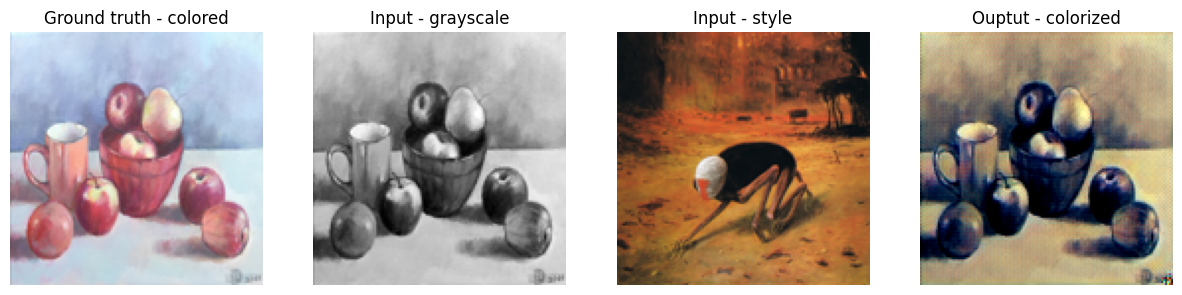

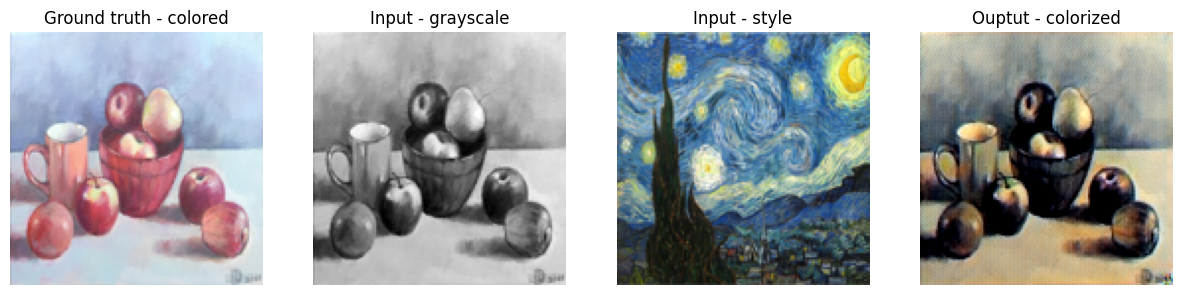

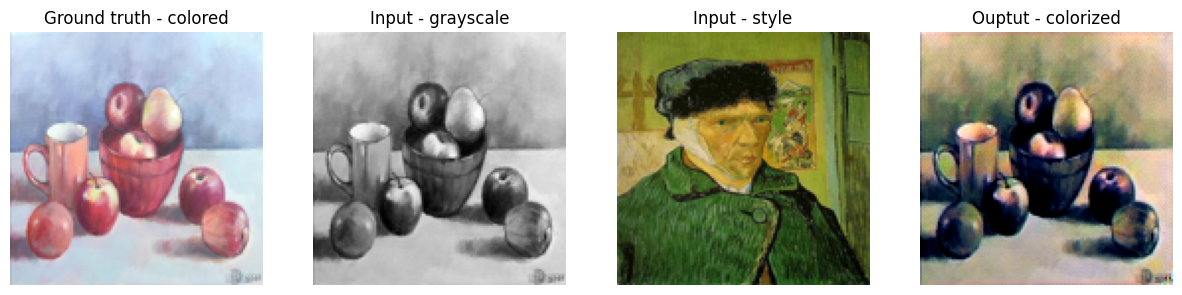

In [160]:
for i in range(len(recreated_images)):
    plot_four(np.array(source_plotting[i]), np.array(grayscale_plotting[i]), np.array(style_plotting[i]), np.array(recreated_images[i]))